In [1]:
# Read the image and template
# Define a convolution function
# Compute the Hamming distance and mark the symbol
# Define an edge detector using Sobel operator
# Obtain the edge maps from the image and template
# Compute the edge based score in a naive way and mark the symbol
# Compute the edge based score using dynamic programming and mark the symbol

In [3]:
from PIL import Image
import numpy as np
from omr import convolve, convolve_separable

In [4]:
# Read images and templates
clean_target_im = Image.open('./images/music1.png').convert('L')
print(clean_target_im.format, clean_target_im.size, clean_target_im.mode)
clean_target_array = np.array(clean_target_im) / 255.0
print(clean_target_array.shape)
print(' ')

clutter_target_im = Image.open('./images/music2.png').convert('L')
print(clutter_target_im.format, clutter_target_im.size, clutter_target_im.mode)
clutter_target_array = np.array(clutter_target_im) / 255.0
print(clutter_target_array.shape)
print(' ')

note_template = Image.open('./templates/template1.png').convert('L')
print(note_template.format, note_template.size, note_template.mode)
note_template_array = np.array(note_template) / 255.0
print(note_template_array.shape)
print(' ')

quarter_rest_template = Image.open('./templates/template2.png').convert('L')
print(quarter_rest_template.format, quarter_rest_template.size, quarter_rest_template.mode)
quarter_rest_template_array = np.array(quarter_rest_template) / 255.0
print(quarter_rest_template_array.shape)
print(' ')

eighth_rest_template = Image.open('./templates/template3.png').convert('L')
print(eighth_rest_template.format, eighth_rest_template.size, eighth_rest_template.mode)
eighth_rest_template_array = np.array(eighth_rest_template) / 255.0
print(eighth_rest_template_array.shape)

None (1274, 231) L
(231, 1274)
 
None (1435, 382) L
(382, 1435)
 
None (17, 11) L
(11, 17)
 
None (16, 35) L
(35, 16)
 
None (18, 29) L
(29, 18)


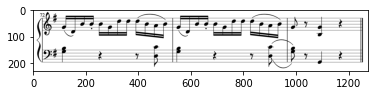

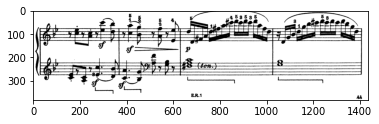

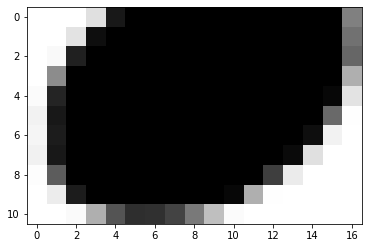

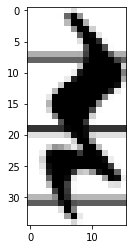

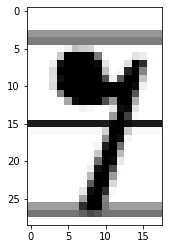

In [5]:
# Display the images and templates
import matplotlib.pyplot as plt

plt.imshow(clean_target_array, cmap='gray')
plt.show()

plt.imshow(clutter_target_array, cmap='gray')
plt.show()

plt.imshow(note_template_array, cmap='gray')
plt.show()

plt.imshow(quarter_rest_template_array, cmap='gray')
plt.show()

plt.imshow(eighth_rest_template_array, cmap='gray')
plt.show()

In [6]:
# Compute Hamming distance
def compute_hamming(I, T):
    M = T.shape[0]
    K = T.shape[1]
#     T_ones = np.ones(T.shape)
    
    # Initialize a hamming score matrix
    hamming_score_row = I.shape[0] - M
    hamming_score_col = I.shape[1] - K
    hamming_score = np.zeros((hamming_score_row, hamming_score_col))
    
    # Loop for each pixel in the image
    for i in range(hamming_score_row):
        for j in range(hamming_score_col):
            score = 0
            for m in range(M):
                for k in range(K):
                    score = score + I[i+m, j+k]*T[m, k] + (1 - I[i+m, j+k])*(1 - T[m, k])
            hamming_score[i, j] = score
    return hamming_score

In [7]:
import time

def detect_symbols_using_hamming(I, T, score_thresh):
    '''Inputs are numpy array'''
    t_1 = time.time()
    hamming_score_array = compute_hamming(I, T)
    t_2 = time.time()
    print("Time for computing hamming distance: ", t_2 - t_1)
    
    indices = np.where(hamming_score_array > hamming_score_array.max()-score_thresh)
    
    return indices

In [8]:
from PIL import ImageDraw
def dispaly_and_save(original_im, template_array, indices, color, file_name):
    im = original_im.copy()
    rgbimg = Image.new("RGBA", im.size)
    rgbimg.paste(im)
    for i in range(indices[0].shape[0]):
        shape = [(indices[1][i], indices[0][i]), (indices[1][i] + template_array.shape[1], indices[0][i] + template_array.shape[0])]
        rgbimg1 = ImageDraw.Draw(rgbimg)
        rgbimg1.rectangle(shape, outline =color)
    rgbimg.show()
    rgbimg.save(file_name)

In [ ]:
idx_1 = detect_symbols_using_hamming(clean_target_array, note_template_array, 15)

In [9]:
dispaly_and_save(clean_target_im, note_template_array, idx_1, 'red', './notes_on_clean_target.png')

In [10]:
idx_2 = detect_symbols_using_hamming(clean_target_array, quarter_rest_template_array, 10)

KeyboardInterrupt: 

In [ ]:
dispaly_and_save(clean_target_im, quarter_rest_template_array, idx_2, 'green', './quarter_rests_on_clean_target.png')

In [ ]:
idx_3 = detect_symbols_using_hamming(clean_target_array, eighth_rest_template_array, 10)

In [ ]:
dispaly_and_save(clean_target_im, eighth_rest_template_array, idx_3, 'blue', './eighth_rests_on_clean_target.png')

In [ ]:
idx_4 = detect_symbols_using_hamming(clutter_target_array, note_template_array, 15)

In [ ]:
dispaly_and_save(clutter_target_im, note_template_array, idx_4, 'red', './notes_on_clutter_target_using_hamming.png')

In [ ]:
idx_5 = detect_symbols_using_hamming(clutter_target_array, quarter_rest_template_array, 15)

In [ ]:
dispaly_and_save(clutter_target_im, quarter_rest_template_array, idx_5, 'green', './quarter_rests_on_clutter_target_using_hamming.png')

In [ ]:
idx_6 = detect_symbols_using_hamming(clutter_target_array, eighth_rest_template_array, 15)

In [ ]:
dispaly_and_save(clutter_target_im, eighth_rest_template_array, idx_6, 'blue', './eighth_rests_on_clutter_target_using_hamming.png')

In [9]:
from scipy.signal import convolve2d
def sobel_gradient(image):
    sobkx1 = np.transpose(np.array([[1,2,1]]))
    sobkx2 = np.array([[-1,0,1]])
    sobky1 = np.transpose(np.array([[-1,0,1]]))
    sobky2 = np.array([[1,2,1]])
    a = convolve_separable(image, sobky1,sobky2)
    b = convolve_separable(image, sobkx1, sobkx2)

    c = np.sqrt(np.square(a) + np.square(b))
    c *= 255.0 / c.max()
    return c

# Define an edge detector
def edge_detector(I):
    '''Input is a numpy array'''
    # Prepare the kernels
    a1 = np.matrix([[1,  2, 1]])
    a2 = np.matrix([[-1, 0, 1]])
    Kx = a1.T * a2
    Ky = a2.T * a1
    
    # Apply the Sobel operator
    Gx = convolve2d(I, Kx, "same", "symm")
    Gy = convolve2d(I, Ky, "same", "symm")
    # Gx = convolve_separable(I, a1.T,a2)
    # Gy = convolve_separable(I, a1, a2.T)

    G = np.sqrt(Gx**2 + Gy**2)
    G *= 255.0 / G.max()
    
    return G

In [10]:
a1 = np.matrix([[1,  2, 1]])
a1.T

matrix([[1],
        [2],
        [1]])

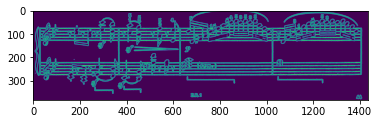

In [11]:
# edge_clutter_target = edge_detector(clutter_target_array)
edge_clutter_target = sobel_gradient(clutter_target_array)
plt.imshow(edge_clutter_target)
plt.show()

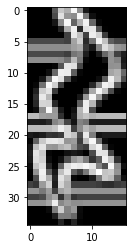

In [12]:
edge_quarter_rest_template = sobel_gradient(quarter_rest_template_array)
plt.imshow(edge_quarter_rest_template)
plt.gray()
plt.show()

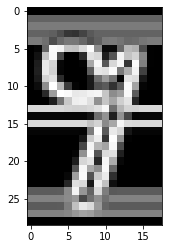

In [17]:
edge_eighth_rest_template = sobel_gradient(eighth_rest_template_array)
plt.imshow(edge_eighth_rest_template)
plt.show()

In [18]:
idx_7 = detect_symbols_using_hamming(edge_clutter_target, edge_eighth_rest_template, 350)

Time for computing hamming distance:  429.05496740341187


In [21]:
idx_7[0]
idx_7

(array([247], dtype=int64), array([180], dtype=int64))

In [22]:
dispaly_and_save(clutter_target_im, eighth_rest_template_array, idx_7, 'blue', './edge_eighth_rests_on_clutter_target_using_hamming.png')

In [ ]:
idx_8 = detect_symbols_using_hamming(edge_clutter_target, edge_quarter_rest_template, 350)

In [ ]:
dispaly_and_save(clutter_target_im, quarter_rest_template_array, idx_8, 'green', './edge_quarter_rests_on_clutter_target_using_hamming.png')

In [30]:
def compute_D(I_edge, T_edge):
    M = T_edge.shape[0]
    K = T_edge.shape[1]
    
    D_row = I_edge.shape[0]
    D_col = I_edge.shape[1]
    
    D = np.zeros((D_row, D_col))
    Image.fromarray(D).show()
    # plt.imshow(D)
    for i in range(D_row):
        for j in range(D_col):
            temp_D = 0
            D_list = []
#             for m in range(D_row):
#             for m in range()
            mm = np.linspace(-M, M, 2*M+1).astype(int)
            for m in mm:
                d_list = []
                kk = np.linspace(-K, K, 2*K+1).astype(int)
#                 for k in range(D_col):
                for k in kk:
                    row_idx = i + m
                    col_idx = j + k
                    if row_idx < 0:
                        row_idx = 0
                    elif row_idx >= D_row:
                        row_idx = D_row-1
                        
                    if col_idx < 0:
                        col_idx = 0
                    elif col_idx >= D_col:
                        col_idx = D_col-1
                        
                    if I_edge[row_idx, col_idx] == 0:
                        gamma = np.inf
                    else:
                        gamma = 0
                    dist = np.sqrt(pow(row_idx - i, 2) + pow(col_idx - j, 2))
                    d = dist + gamma
                    d_list.append(d)
                temp_d = min(d_list)
                D_list.append(temp_d)
            temp_D = min(D_list)
            D[i, j] = temp_D
    return D

In [31]:
def edge_matching_score(D, T_edge, score_thresh):
    M = T_edge.shape[0]
    K = T_edge.shape[1]
    
    score_row = D.shape[0] - M
    score_col = D.shape[1] - K
    score_array = np.zeros((score_row, score_col))
    
    for i in range(score_row):
        for j in range(score_col):
            temp_score = 0
            for m in range(M):
                for k in range(K):
                    temp_score = temp_score + T_edge[m, k]*D[i+m, j+k]
            score_array[i, j] = temp_score
            
    indices = np.where(score_array > score_array.max()-score_thresh)
    
    return indices

In [32]:
D = compute_D(edge_clutter_target, edge_quarter_rest_template)